<a href="https://colab.research.google.com/github/Misha-private/Demo-repo/blob/main/Home_MLModel2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


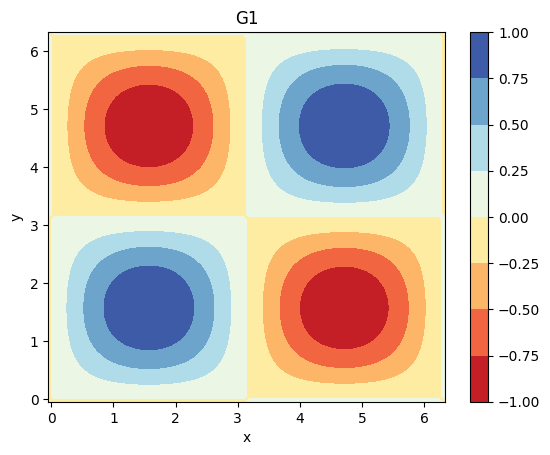

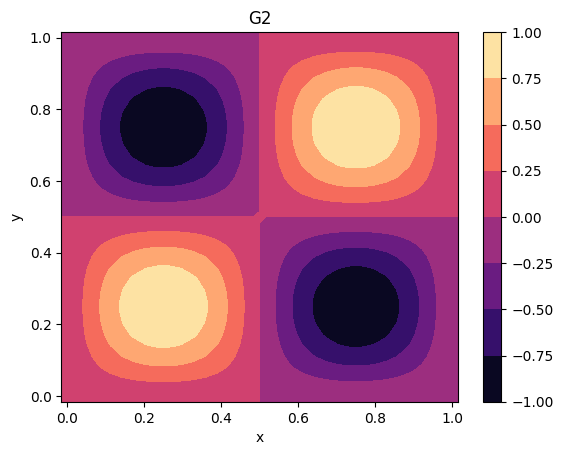

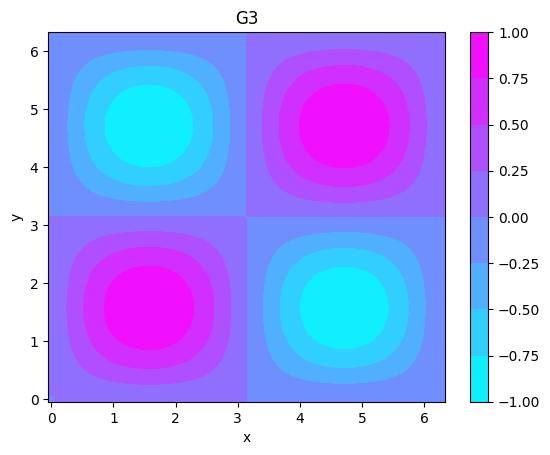

In [78]:
import numpy as np
import matplotlib.pyplot as plt

#
# Generation 1
#

IM = 64
JM = 64

im1 = IM + 2
jm1 = JM + 2


G1 = np.zeros((im1, jm1))
G3 = G1
#print(G1)

x1 = np.arange(0, im1)
y1 = np.arange(0, jm1)
#print(x1)

dx1 = 1/IM
dy1 = 1/JM

xp1 = x1/IM- dx1/2
yp1 = y1/IM -dy1/2


xp1 = 2*np.pi*xp1
yp1 = 2*np.pi*yp1

for i in range(0,im1):
  for j in range(0,jm1):
    G1[i,j] = np.sin(xp1[i])*np.sin(yp1[j])

#
# Generation 2
#

im2 = IM/2 + 2
jm2 = JM/2 + 2

im2 = int(im2)
jm2 = int(jm2)


x2 = np.arange(0, im2)
y2 = np.arange(0, jm2)


dx2 = 1/(im2-2)
dy2 = 1/(jm2-2)

xp2 = x2/(im2-2)-dx2/2
yp2 = y2/(jm2-2)-dy2/2

G2 = np.zeros((im2, jm2))
print(G2)


def upsending(G1, G2, im1, jm1, im2, jm2):

  i1 = 1
  for i2 in range(1,im2-1):
    j1 = 1
    for j2 in range(1,jm2-1):
      G2[i2,j2] = 0.25*(G1[i1,j1] + G1[i1,j1+1] + G1[i1+1,j1] + G1[i1+1,j1+1])
      j1 = j1 + 2
    i1 = i1 + 2

  G2[0,1:jm2-1] = G2[1,1:jm2-1]
  G2[im2-1,1:jm2-1] = G2[im2-2,1:jm2-1]
  G2[:,0] = G2[:,1]
  G2[:,im2-1] = G2[:, im2-2]

  return G2

def downsending(G2, G1, im2, jm2, im1, jm1):
  alpha = 3/4
  beta = 1/4
  a2 = alpha*alpha
  b2 = beta*beta
  ab = alpha*beta

  i1 = 1
  for i2 in range(0,im2-1):
    i1 = 0
    for i2 in range(0,im2-1):
      j1 = 0

      U1 = G1[i1,j1]
      U2 = G1[i1,j1+1]
      U3 = G1[i1+1,j1]
      U4 = G1[i1+1,j1+1]

      G1[i1,j1]    = a2*U1 + ab*U2 + ab*U3 + b2*U4
      G1[i1+1,j1]  = ab*U1 + a2*U2 + ab*U3 + b2*U4
      G1[i1,j1+1]  = ab*U1 + b2*U2 + a2*U3 + ab*U4
      G1[i1+1,j1+1]= b2*U1 + ab*U2 + ab*U3 + a2*U4

      j1 = j1 + 2
    i1 = i1 + 2

  G1[0,1:jm1-1] = G1[1,1:jm1-1]
  G1[im1-1,1:jm1-1] = G1[im1-2,1:jm1-1]
  G1[:,0] = G1[:,1]
  G1[:,im1-1] = G1[:, im1-2]



plt.contourf(xp1, yp1, G1, cmap=plt.cm.RdYlBu)

plt.colorbar()
plt.title('G1')
plt.xlabel('x')
plt.ylabel('y')

#sw = [0, 0]
#nw = [0, 6.28]
#se = [6.28, 0]
#ne = [6.28, 6.28]


#plt.plot(sw,nw, linestyle = 'dashed')
#plt.plot(nw,ne, linestyle = 'dashed')
#plt.plot(se,ne, linestyle = 'dashed')
#plt.plot(sw,se, linestyle = 'dashed')

plt.show()

# Upsend

upsending(G1, G2, im1, jm1, im2, jm2)

plt.contourf(xp2, yp2, G2, cmap='magma')

plt.colorbar()
plt.title('G2')
plt.xlabel('x')
plt.ylabel('y')

plt.show()


# Downsend

downsending(G2, G3, im2, jm2, im1, jm1)

plt.contourf(xp1, yp1, G3, cmap='cool')

plt.colorbar()
plt.title('G3')
plt.xlabel('x')
plt.ylabel('y')

plt.show()



In [ ]:
for i in range(1,10):
  print(i)

1
2
3
4
5
6
7
8
9
